# CLUSTERING

## Introduction

### About the data:

The record data shows air quality in New York city and it's effects on people in New york city. It includes a concentration measure for the years 2015-2020, as well as toxicity consequences. This data is clustered to get insight into the underlying patterns of several concentration measures. The data was pre-processed, with null values and unnecessary columns deleted, and normalised. Supervised learning models were used to forecast air quality and the number of persons of various ages who were affected by it. The purpose of unsupervised learning was to look for parallels in the toxicity of air quality. To get the outcome, three distinct clustering techniques were used, K-means, density-based spatial clustering with noise, and hierarchical clustering.  The model demonstrates that the toxicities aren't very diverse to one other in an attempt to uncover similarities within the air toxicity. 

### Import the required Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", palette='Set2')
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle
from sklearn import metrics

#### Read the data

In [6]:
data = pd.read_csv('../../data/ny-air.csv')
data.drop(columns=['indicator_data_id','indicator_id','geo_type_name','geo_type_name','data_valuemessage', 'name'], inplace=True)
data.head()

,measure,geo_entity_id,geo_entity_name,year_description
0,Average Concentration,1,Bronx,2005
1,Average Concentration,2,Brooklyn,2005
2,Average Concentration,3,Manhattan,2005
3,Average Concentration,4,Queens,2005
4,Average Concentration,5,Staten Island,2005


To get the information of the data being used.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   measure           2769 non-null   object
 1   geo_entity_id     2769 non-null   int64 
 2   geo_entity_name   2769 non-null   object
 3   year_description  2769 non-null   object
dtypes: int64(1), object(3)
memory usage: 86.7+ KB


Checking for missing Values. The data was cleaned before and thus doesn't have any missing values. If there are missing values the null values should be replaced with most common value for that column, to get optimal result.

In [8]:
#checking for missing values
data.isnull().sum()

measure             0
geo_entity_id       0
geo_entity_name     0
year_description    0
dtype: int64

Coverting non-numerical data its corresonding categorical statistical Values. 

In [9]:
data['measure'] = data['measure'].astype('category').cat.codes
data['geo_entity_name'] = data['geo_entity_name'].astype('category').cat.codes
data['year_description'] = data['year_description'].astype('category').cat.codes
data.head()

,measure,geo_entity_id,geo_entity_name,year_description
0,0,1,11,1
1,0,2,12,1
2,0,3,54,1
3,0,4,67,1
4,0,5,80,1


#### Normalizing the data

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

In [11]:
X

array([[-1.53565487, -1.72051886, -1.43105854, -0.42852969],
       [-1.53565487, -1.71373107, -1.39481877, -0.42852969],
       [-1.53565487, -1.70694327,  0.12725145, -0.42852969],
       ...,
       [-1.17943234,  1.68016714,  1.03324562, -0.42852969],
       [-1.17943234,  1.68695494,  1.68556143, -0.42852969],
       [-1.17943234,  1.69374274,  0.88828655, -0.42852969]])

### K-Means Clustering



#### Hyper-parameter tuning.

Here, hyper parameter tuning method used is **Elbow Method**. This method is chosen because the dimension in the data set is small and elbow method is good for data with small dimension.
For each value of k an average score for all cluster is computed. Distortion and inertia is computed to find the nearest centroid for each value.

Finding the optimal K value for the data.

K-means is the simplest clustering algorithm. It forms K clusters for n number of records.
The alogorithm works as follows:
<br>
-  First k is initialized randomly. It is called cluster centriods. In the code below this k value is 1 to 10.
- For each k, inertia is calculated. Inertia is calculated by sqauring and summing the distance between each data point and its centroid.
- A good model is one with low inertia and less number of clusters.
- Distortion for each k value is calculated. It is the distance between most dominating centroid and sqaured distances between each observation.
- Distortion should be low for optimal clusters.

In [12]:
kmeans_df = pd.DataFrame(columns=['clusters', 'inertia', 'distortion'])
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    kmeans_df = kmeans_df.append({'clusters': i, 'inertia': kmeans.inertia_, 'distortion': sum(np.min(cdist(data, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]}, ignore_index=True)

kmeans_df.head(10)

,clusters,inertia,distortion
0,1.0,11076.000000,265.520953
1,2.0,8300.378300,264.587715
2,3.0,5825.142730,264.550993
3,4.0,4537.922962,264.491549
4,5.0,3763.329733,264.464052
5,6.0,3126.603529,264.457358
6,7.0,2816.972075,264.430827
7,8.0,2493.832029,264.438496
8,9.0,2282.045592,264.036635
9,10.0,2101.312105,264.033533


array([<AxesSubplot:xlabel='clusters'>, <AxesSubplot:xlabel='clusters'>],
      dtype=object)

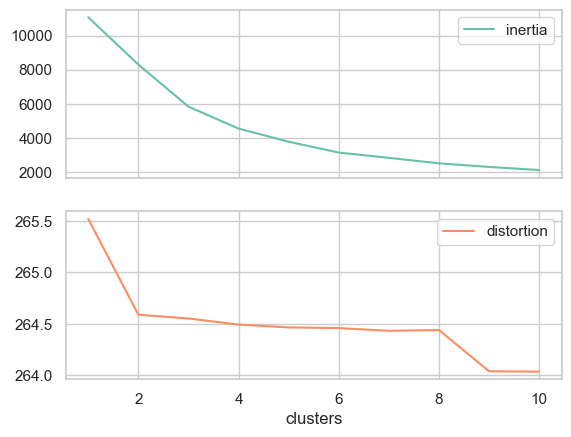

In [13]:
kmeans_df.plot.line(x="clusters", subplots=True)

- A graph is plotted against the k clusters and, inertia and distortion respectively
- We can see that the graph decreases linearly after k=9.
- Therefore, optimal k is chosen as 9.

#### K means for 9 clusters.

Data is fit into K-means algorithm after choosing the optimal K value as 9. 
The labels are then predicted. A graph is plotted for 9 clusters for two variables in the data.
We see that some of the clusters are overlapping.

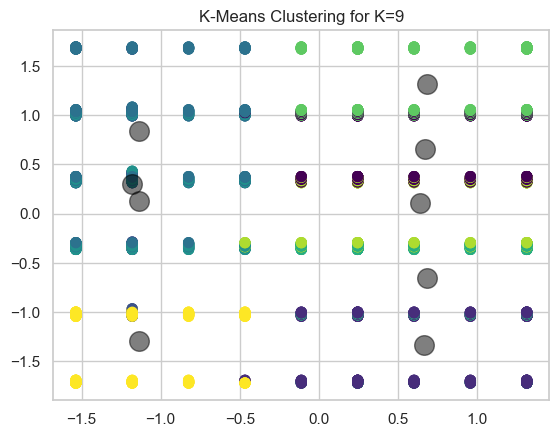

In [14]:
kmeans = KMeans(n_clusters=9, random_state=1997)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
plt.title('K-Means Clustering for K=9')
plt.show()

#### Limitations of K-means:
- K-means work well only on numerical data. 
- It assumes that each cluster has almost equal number of obsrvation.

## DBSCAN - Density-based spatial clustering of applications with noise

DBSCAN is one of the most common clustering algorithms. It groups together points that are close to each other based on a distance measurement (Euclidean distance) and minimum nuber of points. DBSCAN also identifies outliers that are not nearer to any clusters.
DBSCAN requires two parameters

eps: defines how near points must be to one another in order to be deemed part of a cluster. It signifies that two points are considered neighbors if their distance is less than or equal to this amount (eps).

minPoints: the smallest number of points required to establish a dense zone. If we set the minPoints parameter to 5, for example, we will require at least 5 points to construct a dense zone.

### Hyper parameter tuning:

#### Choosing optimal cluster value using Silhouette score.

Silhouette co-efficient is a measure of how similar a data poin is within-cluster (cohesion) compared to other clusters.
- Selected a range of k values
- Coputed eps, min samples, and silhouette score for each k value.



In [15]:
dbscan_df = pd.DataFrame(columns=['eps', 'min_samples', 'clusters', 'silhouette_score'])

for i in np.arange(0.1, 5.1, 0.1):
    
    for j in range(1, 11):
        
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(X)
        
        if (len(set(dbscan.labels_) - set([-1])) > 1) & (len(set(dbscan.labels_) - set([-1])) < 11):
            dbscan_df = dbscan_df.append({'eps': i, 'min_samples': j, 'clusters': len(set(dbscan.labels_) - set([-1])), 'silhouette_score': silhouette_score(X, dbscan.labels_)}, ignore_index=True)
        
        else:
            dbscan_df = dbscan_df.append({'eps': i, 'min_samples': j, 'clusters': 0, 'silhouette_score': 0}, ignore_index=True)
        
dbscan_df.head()

,eps,min_samples,clusters,silhouette_score
0,0.1,1.0,0.0,0.0
1,0.1,2.0,0.0,0.0
2,0.1,3.0,0.0,0.0
3,0.1,4.0,0.0,0.0
4,0.1,5.0,0.0,0.0


#### Plot for Silhouette scores for each cluster value.

The value of silhouette coefficient is [-1,1]
- 1 denotes that the data is very compact and is within the cluster.
- -1 value denotes that the data is no where near the cluster.
- 0 denotes that the clusters are overlapping.

From the graph plotted below, the optimal cluster size is 3,eps is 1.6, and min_samples is 3.

<AxesSubplot:xlabel='clusters'>

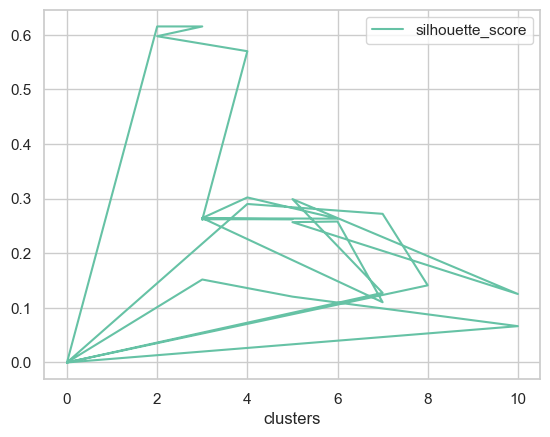

In [16]:
dbscan_df.plot.line(x='clusters', y='silhouette_score')

In [17]:
optimal_cluster_size = dbscan_df['clusters'][dbscan_df['silhouette_score'] == max(dbscan_df['silhouette_score'])]
optimal_cluster_size

150    3.0
151    3.0
152    3.0
153    2.0
154    2.0
155    2.0
156    2.0
157    2.0
158    2.0
159    2.0
Name: clusters, dtype: float64

After calculating the optimal values, the data is fit into DBSCAN algorithm.
labels are predicted. 
-1 in labels is essentially noise. In this ecord data we don't see any noise.
The unique cluster labels are 0,1 and 2.

The optimal cluster size is 3 , epsilon = 1.6 and min_sample = 3.

In [18]:
dbscan = DBSCAN(eps=1.6, min_samples=3)
dbscan.fit(X)
y_pred = dbscan.fit_predict(X)
labels_DB = dbscan.labels_
print(labels_DB)

[0 0 0 ... 0 0 0]


In [19]:
np.unique(labels_DB)

array([0, 1, 2])

Count in each cluster is calculated. By this it can be said that many clusters are overlapping, which means the aire quality measure is not very dissimilar in NYC.
A graph is plotted to show the same. Clusters is plotted against the measure to check the similarities within the air quality measure.

In [20]:
from collections import Counter
Counter(labels_DB)

Counter({0: 2748, 1: 3, 2: 18})

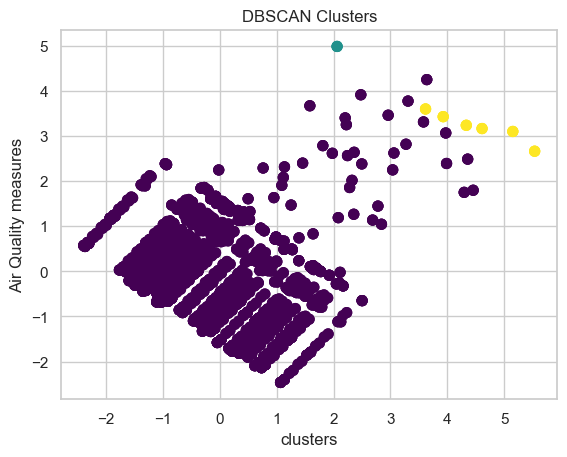

In [21]:
#plot clusters using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_DB, s=50, cmap='viridis')
plt.xlabel('clusters')
plt.ylabel('Air Quality measures') 
plt.title('DBSCAN Clusters')
plt.show()


#### DBSCAN limitations

- DBSCAN likely to fail if your dataset contains different densities or variable densities. In such circumstances, it is ineffective. 
- It is particularly sensitive to hyperparameter changes. A small adjustment in hyperparameters can result in a significant difference in outcome. 
- As we all know, a term like density may not perform well in data with high dimensionality. It should not be used for text data.

## Hierarchical Clustering

Hierarchical clustering is a cluster analysis method that aims to create a hierarchy of groups. There are primarily two types of hierarchical clustering strategies:

Agglomerative: A "bottom-up" strategy in which each observation begins in its own cluster and pairs of clusters are combined as one advances up the hierarchy.

Dividesive: This is a "top-down" technique in which all observations begin in the same cluster and splits are conducted recursively as one progresses down the hierarchy.

### Aglomerative clustering

- The most popular type of hierarchical clustering is agglomerative clustering, which is used to organize objects into clusters based on their similarity. 
- The technique begins by considering each item to be a singleton cluster.
Following that, pairs of clusters are combined one by one until all clusters have been merged into one large cluster holding all items. 
- The resulting dendrogram is a tree-based representation of the objects.

Here, the data is fit into aglomerative clustering algorithm from the features or distance matrix. The labels are predicted. A dendogram is plotted and it is seen that the clusters are combined and two big clustters are formed. 
A dendogram is plotted showing the similarities between the entities. 

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering().fit(data)
labels = model.labels_

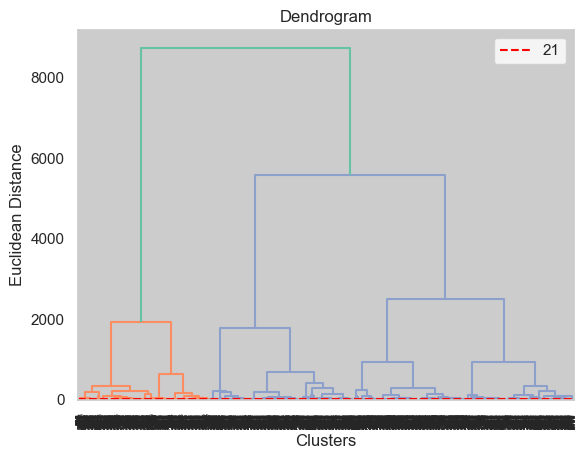

In [23]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.

Z = linkage(data, method='ward')
dend = dendrogram(Z)
plt.axhline(y=21, color='r', linestyle='--', label='21')
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.legend()
plt.show()

### Limitations of Aglomerative clustering
- Groups with closer pairs can merge sooner than optimal, even when they have overall dissimilarity.
- They can be computationally intensive
- Merging cannot be undone, which can be problematic if you have noisy, high-dimensional data.


### Final Results

- Performing clustering using varios algorithms gave various results. The K means algorithm used 9 clusters to classify the data set, where as in DBSCAN only 3 clusters were chosen to be optimal.
- From both the methods it is safe to say that the data has more similarity. Because most data points fall into one cluster.
- Aglomerative clustering was more time consuming, followed by DBSCAN and K- means.
- Optimal result was obtained by DBSCAN, as it shows the similarities between the air pollution measures and it's toxicity in the data, which was the goal.

### Concusion

The air quality data was chosen for clustering algorithm to identify similarities between air toxicity. Performing clustering on this algorithm proves that although, there are few dissimilar toxicities in the data most air toxicities are similar.
Out of the three algorithms used, DBSCAN is found best for this dataset considering the time, number of clusters and data points in each clusters.